# Import Modules

In [1]:
import cv2
import numpy as np
import dlib
import os
import matplotlib.pyplot as plt

# Load Image and change the Color Space  

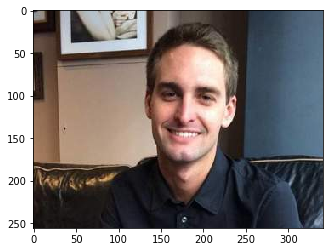

In [13]:
#image is loaded using cv2.imread() method.
#image is loaded in BGR format.
#for better image analysis,the loaded image is converted to GRAY color-space.
#for better visualization,the loaded image is converted to RGB color-space.

original_bgr_img=cv2.imread("face.jpg")
original_gray_img=cv2.cvtColor(original_bgr_img,cv2.COLOR_BGR2GRAY)
original_rgb_img=cv2.cvtColor(original_bgr_img,cv2.COLOR_BGR2RGB)
plt.imshow(original_rgb_img)

# Apply dlib detector and predictor

In [3]:
#dlib’s pre-trained facial landmark detector is used to localize all facial structures.
#dlib landmark predictor returns the locations of facial structures.

detector=dlib.get_frontal_face_detector()
predictor=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Face Detection

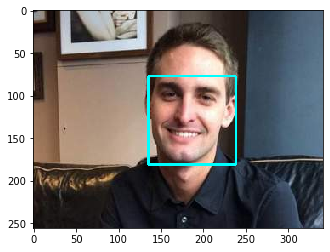

In [4]:
#all the boundary points are located using detector and rectangle is drawn depicting the face boundary.
#image is plotted using plt.imshow() method.

face=detector(original_gray_img)
for i in face:
    cv2.rectangle(original_bgr_img,(i.left(),i.top()),(i.right(),i.bottom()),(255,255,0),2)
    
detected_face=cv2.cvtColor(original_bgr_img,cv2.COLOR_BGR2RGB)
plt.imshow(detected_face)

# Facial Landmark Detection

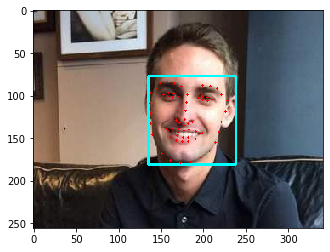

In [8]:
#detector stores the list of all the faces present in a given image.
#So,each one is extracted and predictor method is applied to each to detect facial landmarks.
#color filled circle is used (here) to indicate all the 68 landmarks.

face=detector(original_gray_img)
for i in face:
    landmarks=predictor(original_gray_img,i)
    for n in range(0,68):
        x=landmarks.part(n).x
        y=landmarks.part(n).y
        cv2.circle(original_bgr_img,(x,y),1,(0,0,255),-1)
        
detected_landmarks=cv2.cvtColor(original_bgr_img,cv2.COLOR_BGR2RGB)
plt.imshow(detected_landmarks)

# Face Alignment

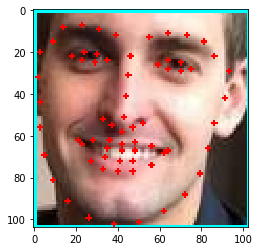

In [9]:
#all the boundary points are located using detector and the face is retrieved from the whole big image.
#image is plotted using plt.imshow() method.

face=detector(original_gray_img)
for i in face:
    exact_face=original_bgr_img[i.top():i.bottom(),i.left():i.right()]
    Aligned_face=cv2.cvtColor(exact_face,cv2.COLOR_BGR2RGB)
    plt.imshow(Aligned_face)
    